# Mapping QTL in the BXD using R/qtl2

[Karl Broman](https://kbroman.org)
[<img style="display:inline-block;" src="https://orcid.org/sites/default/files/images/orcid_16x16(1).gif">](https://orcid.org/0000-0002-4914-6671),
[Department of Biostatistics & Medical Informatics](https://www.biostat.wisc.edu), 
[University of Wisconsin&ndash;Madison](https://www.wisc.edu)

Our aim in this tutorial is to demonstrate how to map quantitative trait loci (QTL) in the BXD recombinant inbred lines using the [R/qtl2](https://kbroman.org/qtl2) software. We will first show how to download BXD phenotypes from [GeneNetwork2](http://gn2.genenetwork.org) using its API, via the R package [R/GNapi](https://github.com/rqtl/GNapi). At the end, we will use the [R/qtl2browse](https://github.com/rqtl/qtl2browse) package to display genome scan results using the [Genetics Genome Browser](https://github.com/chfi/purescript-genome-browser).

## Acquiring phenotypes with the GeneNetwork API

We will first use the [GeneNetwork2](http://gn2.genenetwork.org) API to acquire BXD phenotypes to use for mapping. We will use the R package [R/GNapi](https://github.com/rqtl/GNapi). 

We first need to install the package from its [GitHub](https://github.com) repository. To do so, we need the [devtools](https://github.com/r-lib/devtools) package.

```r
install.packages("devtools")
```

We then load the devtools package and install the R/GNapi package with `install_github()`.

```r
library(devtools)
install_github("rqtl/GNapi")
```

In [1]:
library(GNapi)

In [2]:
phe <- get_pheno("BXD", "10015")

Warning message in get_pheno("BXD", "10015"):
“sample_name values are not distinct”

In [3]:
head(phe)

data_id,sample_name,sample_name_2,se,value
<int>,<chr>,<chr>,<dbl>,<dbl>
8967057,BXD1,BXD1,0.17,4.81
8967057,BXD1,BXD1,0.17,4.81
8967057,BXD11,BXD11,0.25,8.39
8967057,BXD11,BXD11,0.25,8.39
8967057,BXD12,BXD12,0.26,4.71
8967057,BXD12,BXD12,0.26,4.71


In [4]:
(pheno <- tapply(phe$value, phe$sample_name, median))

BXD1    BXD11    BXD12    BXD13    BXD14    BXD15    BXD16    BXD18    BXD19     BXD2    BXD21    BXD22 
    4.81     8.39     4.71     4.43     4.83     8.33     9.72     9.64    10.51     8.41     4.20     5.14 
   BXD24    BXD25    BXD27    BXD28    BXD29    BXD30    BXD31    BXD32     BXD5     BXD6     BXD8     BXD9 
    5.02     4.63     9.03     9.72     9.52     4.92     4.84     3.91     4.61     8.31     5.11     4.70 
C57BL/6J   DBA/2J 
   10.12     4.61

## Acquire genotype data with R/qtl2

We now want to get genotype data for the BXD panel. We first need to install the [R/qtl2](https://kbroman.org/qtl2) package. It is not available on CRAN, but rather is distributed via a private repository. But we can still use `install.packages()` to install it.

```r
install.packages("qtl2", repos="http://rqtl.org/qtl2cran")
```

We then load the package with `library()`.

In [5]:
library(qtl2)

In [6]:
bxd_file <- "https://raw.githubusercontent.com/rqtl/qtl2data/master/BXD/bxd.zip"

In [7]:
bxd <- read_cross2(bxd_file)

Warning message in recode_geno(sheet, genotypes):
“117497 genotypes treated as missing: "H"”

In [8]:
gmap <- insert_pseudomarkers(bxd$gmap, step=0.2, stepwidth="max")

In [9]:
pmap <- interp_map(gmap, bxd$gmap, bxd$pmap)

In [10]:
pr <- calc_genoprob(bxd, gmap, error_prob=0.002, map_function="c-f")

In [11]:
k <- calc_kinship(pr, "loco")

In [12]:
out <- scan1(pr, pheno, k)

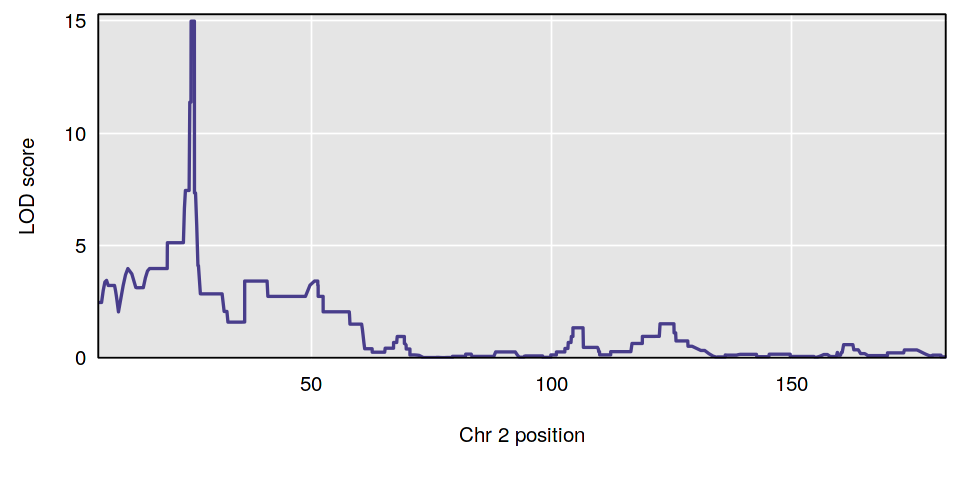

In [13]:
library(repr)
options(repr.plot.height=4, repr.plot.width=8)
par(mar=c(5.1, 4.1, 0.6, 0.6))
plot(out, pmap, chr=2)

In [14]:
mx <- max(out, pmap)

In [15]:
g_imp <- maxmarg(pr, pmap, chr="2", pos=mx$pos, return_char=TRUE)

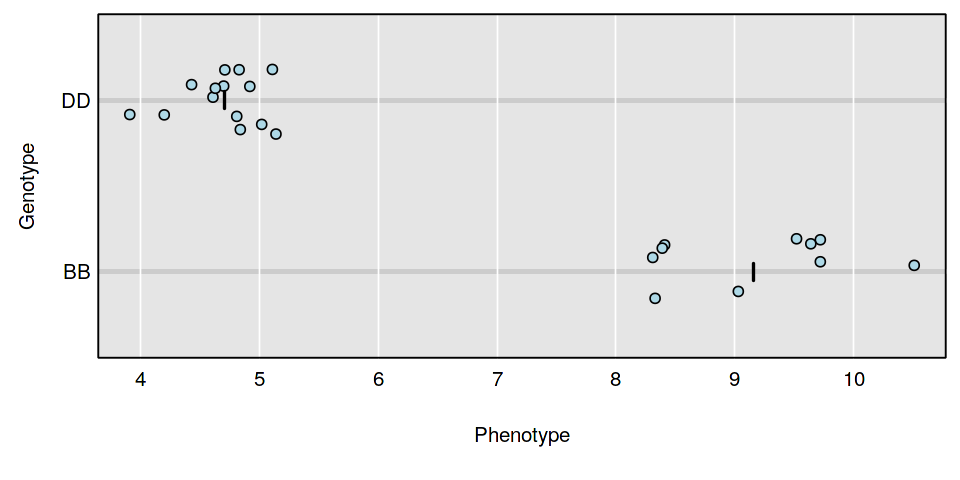

In [16]:
par(mar=c(5.1, 4.1, 0.6, 0.6))
plot_pxg(g_imp, pheno, swap_axes=TRUE)